In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Setting a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)



C:\Users\SHISHUPAL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Load the data from CSV file
train_df = pd.read_csv("C:/Users/SHISHUPAL/Desktop/ISE/SEM 5/MLFA/Assignment Dataset/mnist_train.csv")
test_df = pd.read_csv(r"C:\Users\SHISHUPAL\Desktop\ISE\SEM 5\MLFA\Assignment Dataset\mnist_test.csv")

# Split features and labels
x_train = train_df.iloc[:, 1:].values.astype('float32') / 255.0
y_train = train_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df.iloc[:, 0].values

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [6]:
# Define the model
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_ann = model_ann.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8585 - loss: 0.4794 - val_accuracy: 0.9621 - val_loss: 0.1350
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9615 - loss: 0.1237 - val_accuracy: 0.9680 - val_loss: 0.1102
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9752 - loss: 0.0807 - val_accuracy: 0.9684 - val_loss: 0.1095
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9827 - loss: 0.0566 - val_accuracy: 0.9687 - val_loss: 0.1113
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9864 - loss: 0.0424 - val_accuracy: 0.9688 - val_loss: 0.1201
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9901 - loss: 0.0316 - val_accuracy: 0.9718 - val_loss: 0.1086
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9903 - loss: 0.0281 - val_accuracy: 0.9657 - val_loss: 0.1442
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9925 - loss: 0.0225 -

In [8]:
# Evaluate the model on test data
loss, accuracy = model_ann.evaluate(x_test, y_test)
print(f"ANN Model Test Accuracy: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9673 - loss: 0.1369
ANN Model Test Accuracy: 97.12%


In [9]:
# Reshape data to fit the model
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the CNN model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


C:\Users\SHISHUPAL\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8882 - loss: 0.3632 - val_accuracy: 0.9806 - val_loss: 0.0712
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9826 - loss: 0.0560 - val_accuracy: 0.9844 - val_loss: 0.0569
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9881 - loss: 0.0380 - val_accuracy: 0.9880 - val_loss: 0.0467
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9921 - loss: 0.0257 - val_accuracy: 0.9880 - val_loss: 0.0452
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9932 - loss: 0.0205 - val_accuracy: 0.9883 - val_loss: 0.0458
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9953 - loss: 0.0145 - val_accuracy: 0.9896 - val_loss: 0.0494
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9954 - loss: 0.0127 - val_accuracy: 0.9907 - val_loss: 0.0446
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9968 -

In [10]:
# Evaluate the model on test data
loss, accuracy = model_cnn.evaluate(x_test, y_test)
print(f"CNN Model Test Accuracy: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9872 - loss: 0.0619
CNN Model Test Accuracy: 99.00%


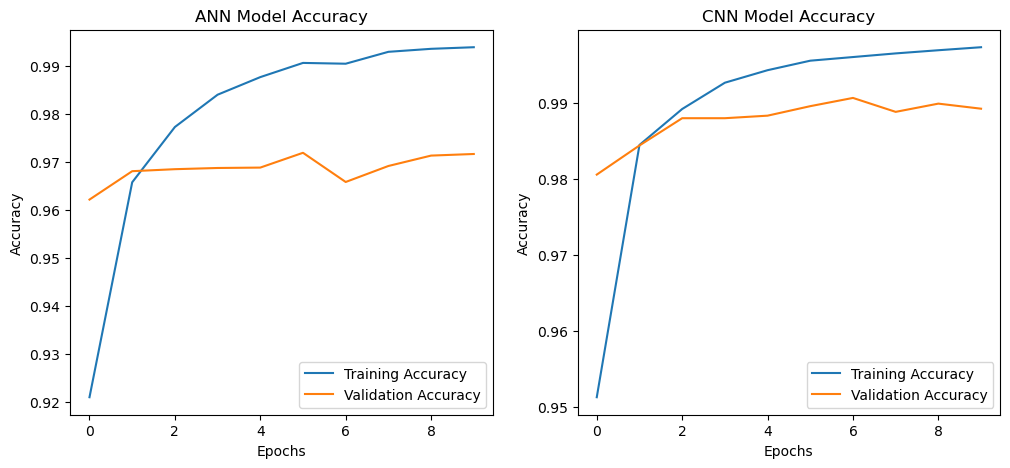

In [11]:
plt.figure(figsize=(12, 5))

# ANN Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# CNN Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
